<h1><b><center>Projet 4</center></b></h1>
<h1><b><center>Anticipez les besoins en consommation électrique de bâtiments</center></b></h1>

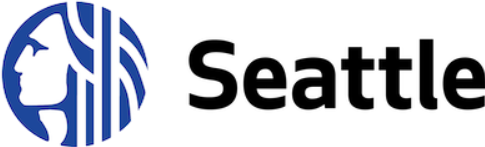

* La ville de Seattle (WA, USA) a pour objectif de devenir une ville neutre en émissions de carbone en 2050.
* Afin de réaliser cet objectif, notre équipe s'intéresse aux consommations électiques et aux emissions de CO2 de bâtiments.
* Cette étude s'intéresse uniquement aux bâtiments non destinés à l'habitation.
* La prédiction se bassera sur les données déclaratives du permis d'exploitation commerciale.

Les données des relevés de consommation sont disponible sur le lien:

https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

<h3><b>Objectif du mission:</b></h3>

Des relevés de consommation sont coûteux à obtenir. Ceci peut être remplacé avec un modèle efficace qui n'aura pas besoin d'utiliser les données issues des rélevés de consommation. Les objectifs de la mission sont de:

* prédire i) la consommation totale d'énergie et ii) les émissions de CO2 en utilisant les données du permis d'exploitation commerciale aux bâtiments non résidentiels.


* identifier le meilleur modèle et évaluer l'intérêt d'ENERGY STAR Score pour la prédiction des émissions de CO2.

<h3><b>Sections de la mission:</h3></b>

Ce travail sera présenté en quatre sections. Le nettoyage et l'exploration des données seront présentés dans ce notebook. Les sections de la modélisation seront présentées dans le notebook: Projet_4_Code.

Les différentes sections de cette mission sont:
<h4>
    
    I. Nettoyage et exploration des données

        I.1. Fusion des dataframes
    
        I.2. Suppression des bâtiments résidentiels
    
        I.3. Nettoyage des données
    
        I.4. Prétraitement des données pour la modélisation

    II. Prédiction de la consommation d'énergie (Site Energy Use)
    
        II.1. Modélisation avec différents modèles
    
        II.2. Tuning du modèle

    III. Prédiction des émissions de CO2 (Total GHG Emissions)
    
        III.1. Modélisation avec différents modèles
    
        III.2. Tuning du modèle
    
    IV. Impact d'ENERGY STAR Score sur les émissions de CO2

        IV.1. Influence d'ENERGY STAR Score
        
        IV.2. Conclusions
</h4>

<h2><center>I. Nettoyage et exploration des données</h2></center>

De l'adresse : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv, nous trouvons deux dataframes qui correspondent aux données de relevés de consommation des bâtiments de Seattle de l'année 2015 et 2016. Pour notre analyse, nous allons fusionner les dataframes.

<h3><center>I.1. Fusion des dataframes</h3></center>

In [1]:
# Importation des librairies

import os
import ast
import math
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

os.chdir('Desktop/OC/Projet_4')

In [2]:
# Importation des données de 2015

data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [3]:
# Importation des données de 2016

data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


Les données de 2015 et 2016 n'ont pas les mêmes colonnes. On investigue la nature de ces colonnes avec info().

In [4]:
# La nature des colonnes des données de 2015

data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
# La nature des colonnes des données de 2016

data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Ensuite, nous identifions les colonnes uniques de deux dataframes.

In [6]:
# Identification des colonnes uniques aux données de 2015

cols_2015 = list(data_2015.columns) 
cols_2016 = list(data_2016.columns)

def cols(cols_2015, cols_2016):
    cols_unique_2015 = list(set(cols_2015) - set(cols_2016))
    cols_unique_2016 = list(set(cols_2016) - set(cols_2015))
    return cols_unique_2015 , cols_unique_2016

print("Les colonnes uniques des données de 2015 sont :")
cols(cols_2015, cols_2016)[0]

Les colonnes uniques des données de 2015 sont :


['GHGEmissions(MetricTonsCO2e)',
 'City Council Districts',
 '2010 Census Tracts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'Comment',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'OtherFuelUse(kBtu)',
 'SPD Beats']

In [7]:
# Identification des colonnes uniques aux données de 2016

print("Les colonnes uniques des données de 2016 sont :")
cols(cols_2015, cols_2016)[1]

Les colonnes uniques des données de 2016 sont :


['Comments',
 'GHGEmissionsIntensity',
 'TotalGHGEmissions',
 'Address',
 'State',
 'Latitude',
 'Longitude',
 'ZipCode',
 'City']

Sauf les colonnes uniques, nous trouvons aussi des données communes comme l'adresse des bâtiments. Contrairement au 'data_2016', toutes les données concernant l'adresse du dataframe 'data_2015' sont décrit dans une seule colonne. Nous allons séparer cette colonne en plusieurs colonnes afin de faciliter la homogénisation des dataframes.

In [8]:
# Les données sur l'adresse des données de 'data_2015' (latitude, longitude, et cetera) sont décrites 
# dans une seule colonne

data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Nous divisons cette colonne afin de homogénéiser le dataframe qui facilitera sa fusion avec 'data_2016'.

In [9]:
# Traitement des données 'Location du fichier de 2015'

data_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_2015.Location.iteritems()]
data_2015 = pd.concat([data_2015.drop(['Location'], axis=1), data_2015['Location'].apply(pd.Series)], axis=1)

data_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_2015.human_address.iteritems()]
data_2015 = pd.concat([data_2015.drop(['human_address'], axis=1), data_2015['human_address'].apply(pd.Series)],
                      axis=1)

data_2015 = data_2015.rename(columns = {"latitude": "Latitude", "longitude": "Longitude", "address": "Address",
                                        "city": "City", "state": "State", "zip": "ZipCode"})
data_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,...,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,...,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,...,56.0,NaN,7.0,19576,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,...,55.0,NaN,48.0,18792,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


Avant la fusion, il faudra homogéniser les noms et les types (dtype) des colonnes.

In [10]:
# Homogénisation des colonnes de data_2015

data_2015 = data_2015.rename(columns = {'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                                        'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                                        'Comment': 'Comments'})

data_2015.drop(['OtherFuelUse(kBtu)', '2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats',
                'Zip Codes'], axis = 1, inplace = True)
data_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,...,No,NaN,Compliant,NaN,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,...,No,NaN,Compliant,NaN,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,...,No,NaN,Compliant,NaN,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,...,No,NaN,Compliant,NaN,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


In [11]:
# Vérification de type de données des colonnes avant de faire la fusion

pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,int64,...,object,object,object,object,object,object,object,object,object,object
1,int64,int64,object,object,object,object,int64,object,int64,float64,...,bool,float64,object,object,float64,float64,object,object,object,float64


In [12]:
# Homogénisation des dataframes

data_2015[['Latitude', 'Longitude', 'ZipCode']] = data_2015[['Latitude', 'Longitude', 'ZipCode']].astype('float64')

Maintenant, les deux dataframes sont homogénisés et ils sont prêts pour la fusion.

In [13]:
# Fusionner les dataframes

data_fusion = [data_2015, data_2016]
data = pd.concat(data_fusion)
data = data.sort_values(by = 'OSEBuildingID', ascending = True)
data = data.reset_index(drop = True)

pd.set_option('display.max_columns', 50)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,NaN,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,False,NaN,Compliant,NaN,47.612200,-122.337990,405 Olive way,Seattle,WA,98101.0
2,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,False,NaN,Compliant,NaN,47.613170,-122.333930,724 Pine street,Seattle,WA,98101.0
3,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,NaN,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
4,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,NaN,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,47.567220,-122.311540,1600 S Dakota St,Seattle,WA,NaN
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,NaN,Compliant,NaN,47.596250,-122.322830,719 8th Ave S,Seattle,WA,NaN
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.20

In [14]:
# Taille du dataframe fusionné "data"

data.shape

(6716, 46)

Avec le dataframe fusioné (data), nous avons les données de 6716 bâtiments de Seattle. Pour ces bâtiments, nous avons 46 variables. Parmi ces variables, il faudra conduire l'analyse sur les variables commerciales.

Ayant obtenu un seul dataframe, nous passons à la prochaine étape de la mission. Cette mission concerne uniquement des bâtiments non résidentiels. De ce fait, nous allons identifier les bâtiments résidentiels et les supprimer du dataframe "data".

<h3><center>I.2. Suppression des bâtiments résidentiels</h3></center>

La variable 'BuildingType' nous permet d'identifier les bâtiments résidentiels. Pourtant, il existe des bâtiments qui sont utilisé pour des multiples besoins.

C'est à dire, il est possible d'avoir un bâtiment résidentiel qui contient quelques bureaux dans le bâtiment. 

Nous utilisons la variable 'PrimaryPropertyType' pour cibler les bâtiments qui sont utilisés principalement pour l'habitation. Ces bâtiments sont ensuite supprimer du dataframe 'data' pour notre analyse.

In [15]:
# Afin de supprimer les bâtiments résidentiels, nous faisons un groupby()

data.groupby(['BuildingType']).count()

,OSEBuildingID,DataYear,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
BuildingType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Campus,46,46,46,46,46,46,46,46,46,45,46,46,46,46,46,46,21,21,13,13,0,9,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0,46,0,46,46,46,46,46,46
Multifamily HR (10+),217,217,217,217,217,217,217,217,217,217,217,217,217,212,209,209,141,141,68,68,8,193,217,217,217,217,217,217,217,217,217,217,217,217,217,217,0,217,4,217,217,217,217,217,217
Multifamily LR (1-4),2047,2047,2047,2047,2047,2047,2047,2047,2041,2047,2047,2047,2047,1997,1989,1989,778,778,167,167,5,1762,2040,2041,2037,2037,2041,2041,2037,2037,2037,2037,2037,2037,2037,2047,1,2047,45,2047,2047,2047,2047,2047,2047
Multifamily MR (5-9),1134,1134,1134,1134,1133,1134,1134,1134,1134,1134,1134,1134,1134,1116,1115,1115,652,652,237,237,28,927,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,0,1134,19,1134,1134,1134,1134,1134,1134
NonResidential,2921,2921,2921,2921,2921,2921,2921,2921,2919,2917,2921,2921,2921,2862,2854,2854,1559,1559,617,617,172,2008,2917,2917,2918,2918,2918,2917,2918,2918,2918,2918,2918,2918,2918,2920,5,2921,44,2921,2921,2921,2921,2921,2921
Nonresidential COS,153,153,153,153,152,153,153,153,153,150,153,153,153,153,153,153,83,83,52,52,2,20,153,153,153,153,153,153,153,153,153,153,153,153,153,153,0,153,1,153,153,153,153,153,137
Nonresidential WA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1
SPS-District K-12,197,197,197,197,197,197,197,197,197,197,197,197,197,193,193,193,4,4,2,2,14,174,191,191,191,191,191,191,191,191,191,191,191,191,191,197,7,197,3,197,197,197,197,197,197


De ce groupby(), nous constatons que les bâtiments du type 'Multifamily' sont des bâtiments résidentiels. HR (High Rise), MR (Medium Rise) et LR (Low Rise) représente le type du bâtiment résidentiel (les nombres des étages dans le bâtiment). Nous homogénéisons les bâtiments résidentiels et non résidentiels. 

In [16]:
# Correction des valeurs 'BuildingType'

data.loc[data['BuildingType'] == 'Multifamily HR (10+)', 'BuildingType'] = 'Multifamily'
data.loc[data['BuildingType'] == 'Multifamily LR (1-4)', 'BuildingType'] = 'Multifamily'
data.loc[data['BuildingType'] == 'Multifamily MR (5-9)', 'BuildingType'] = 'Multifamily'
data.loc[data['BuildingType'] == 'Nonresidential WA', 'BuildingType'] = 'NonResidential'
data.loc[data['BuildingType'] == 'Nonresidential COS', 'BuildingType'] = 'NonResidential'

In [17]:
# Suppression des données des bâtiments résidentiels

non_residentiel = ['NonResidential','SPS-District K-12', 'Campus']
data = data[data["BuildingType"].isin(non_residentiel)]
data = data.reset_index(drop = True)
data.groupby(['BuildingType']).count()

,OSEBuildingID,DataYear,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
BuildingType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Campus,46,46,46,46,46,46,46,46,46,45,46,46,46,46,46,46,21,21,13,13,0,9,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0,46,0,46,46,46,46,46,46
NonResidential,3075,3075,3075,3075,3074,3075,3075,3075,3073,3068,3075,3075,3075,3016,3008,3008,1642,1642,669,669,174,2028,3071,3071,3072,3072,3072,3071,3072,3072,3072,3072,3072,3072,3072,3074,5,3075,45,3075,3075,3075,3075,3075,3059
SPS-District K-12,197,197,197,197,197,197,197,197,197,197,197,197,197,193,193,193,4,4,2,2,14,174,191,191,191,191,191,191,191,191,191,191,191,191,191,197,7,197,3,197,197,197,197,197,197


Maintenant, nous allons voir l'utilisation principale des bâtiments afin de cibler les bâtiments residentiels.

In [18]:
# Utilisation principale des bâtiments

data.groupby(['PrimaryPropertyType']).count()

,OSEBuildingID,DataYear,BuildingType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
PrimaryPropertyType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
College/University,21,21,21,21,21,21,21,21,21,21,21,21,21,21,20,20,4,4,0,0,0,0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,0,21,0,21,21,21,21,21,21
Distribution Center,55,55,55,55,55,55,55,55,55,55,55,55,55,53,53,53,29,29,8,8,0,42,55,55,55,55,55,55,55,55,55,55,55,55,55,55,0,55,0,55,55,55,55,55,55
Distribution Center\n,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,28,28,8,8,0,39,51,51,51,51,51,51,51,51,51,51,51,51,51,51,0,51,0,51,51,51,51,51,51
Hospital,20,20,20,20,20,20,20,20,20,20,20,20,20,19,19,19,10,10,0,0,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,0,20,20,20,20,20,20
Hotel,149,149,149,149,149,149,149,149,149,149,149,149,149,143,142,142,65,65,26,26,2,143,149,149,149,149,149,149,149,149,149,149,149,149,149,149,0,149,3,149,149,149,149,149,149
K-12 School,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,7,7,2,2,14,254,269,269,269,269,269,269,269,269,269,269,269,269,269,275,7,275,4,275,275,275,275,275,275
Laboratory,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,5,5,2,2,0,0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,0,11,11,11,11,11,11
Large Office,344,344,344,344,344,344,344,344,344,344,344,344,344,338,338,338,299,299,172,172,139,324,344,343,344,344,344,343,344,344,344,344,344,344,344,344,0,344,13,344,344,344,344,344,344
Low-Rise Multifamily,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,2,2,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,1,5,5,5,5,5,5


Nous corrigeons les valeurs redondantes.

In [19]:
# Correction des valeurs 'PrimaryPropertyType'

data.loc[data['PrimaryPropertyType'] == 'Restaurant\n', 'PrimaryPropertyType'] = 'Restaurant'
data.loc[data['PrimaryPropertyType'] == 'Self-Storage Facility\n', 'PrimaryPropertyType'] = 'Self-Storage Facility'
data.loc[data['PrimaryPropertyType'] == 'Supermarket / Grocery Store', 'PrimaryPropertyType'] = 'Supermarket/Grocery Store'
data.loc[data['PrimaryPropertyType'] == 'Distribution Center\n', 'PrimaryPropertyType'] = 'Distribution Center'
data.groupby(['PrimaryPropertyType']).count()

,OSEBuildingID,DataYear,BuildingType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
PrimaryPropertyType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
College/University,21,21,21,21,21,21,21,21,21,21,21,21,21,21,20,20,4,4,0,0,0,0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,0,21,0,21,21,21,21,21,21
Distribution Center,106,106,106,106,106,106,106,106,106,106,106,106,106,104,104,104,57,57,16,16,0,81,106,106,106,106,106,106,106,106,106,106,106,106,106,106,0,106,0,106,106,106,106,106,106
Hospital,20,20,20,20,20,20,20,20,20,20,20,20,20,19,19,19,10,10,0,0,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,0,20,20,20,20,20,20
Hotel,149,149,149,149,149,149,149,149,149,149,149,149,149,143,142,142,65,65,26,26,2,143,149,149,149,149,149,149,149,149,149,149,149,149,149,149,0,149,3,149,149,149,149,149,149
K-12 School,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,7,7,2,2,14,254,269,269,269,269,269,269,269,269,269,269,269,269,269,275,7,275,4,275,275,275,275,275,275
Laboratory,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,5,5,2,2,0,0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,0,11,11,11,11,11,11
Large Office,344,344,344,344,344,344,344,344,344,344,344,344,344,338,338,338,299,299,172,172,139,324,344,343,344,344,344,343,344,344,344,344,344,344,344,344,0,344,13,344,344,344,344,344,344
Low-Rise Multifamily,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,2,2,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,1,5,5,5,5,5,5
Medical Office,82,82,82,82,82,82,82,82,82,80,82,82,82,81,80,80,37,37,7,7,3,78,82,82,82,82,82,82,82,82,82,82,82,82,82,82,0,82,0,82,82,82,82,82,82


Parmi ces bâtiments, nous trouvons des bâtiments residentiels comme 'Low-Rise Multifamily', 'Residence Hall' et 'Residence Hall/Dormitory'.

In [20]:
# Suppression des données des bâtiments résidentiels avec 'PrimaryPropertyType'

non_residentiel_2 = ['Low-Rise Multifamily', 'Residence Hall', 'Residence Hall/Dormitory']
data = data[~data["PrimaryPropertyType"].isin(non_residentiel_2)]
data = data.reset_index(drop = True)
data.groupby(['PrimaryPropertyType']).count()

,OSEBuildingID,DataYear,BuildingType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
PrimaryPropertyType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
College/University,21,21,21,21,21,21,21,21,21,21,21,21,21,21,20,20,4,4,0,0,0,0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,0,21,0,21,21,21,21,21,21
Distribution Center,106,106,106,106,106,106,106,106,106,106,106,106,106,104,104,104,57,57,16,16,0,81,106,106,106,106,106,106,106,106,106,106,106,106,106,106,0,106,0,106,106,106,106,106,106
Hospital,20,20,20,20,20,20,20,20,20,20,20,20,20,19,19,19,10,10,0,0,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,0,20,20,20,20,20,20
Hotel,149,149,149,149,149,149,149,149,149,149,149,149,149,143,142,142,65,65,26,26,2,143,149,149,149,149,149,149,149,149,149,149,149,149,149,149,0,149,3,149,149,149,149,149,149
K-12 School,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,7,7,2,2,14,254,269,269,269,269,269,269,269,269,269,269,269,269,269,275,7,275,4,275,275,275,275,275,275
Laboratory,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,5,5,2,2,0,0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,0,11,11,11,11,11,11
Large Office,344,344,344,344,344,344,344,344,344,344,344,344,344,338,338,338,299,299,172,172,139,324,344,343,344,344,344,343,344,344,344,344,344,344,344,344,0,344,13,344,344,344,344,344,344
Medical Office,82,82,82,82,82,82,82,82,82,80,82,82,82,81,80,80,37,37,7,7,3,78,82,82,82,82,82,82,82,82,82,82,82,82,82,82,0,82,0,82,82,82,82,82,82
Mixed Use Property,220,220,220,220,220,220,220,220,219,220,220,220,220,214,214,214,214,214,194,194,3,53,219,219,219,219,219,219,219,219,219,219,219,219,219,220,0,220,0,220,220,220,220,220,216


Ainsi, nous obtenons un dataframe qui contient aucun bâtiment résidentiel. La modélisation sera conduite sur ces bâtiments.

In [21]:
# Nombre des bâtiments

data.shape

(3277, 46)

Nous avons 3277 bâtiments à disposition pour la modélisation.

<h3><center>I.3. Nettoyage des données</h3></center>

Dans cette section, nous préparons le dataframe pour la modélisation. Cette préparation consiste de :
    
1) Définition d'une variable distance en fonction de 'Latitude' et 'Longitude'
    
2) Nettoyage des valeurs des variables
    
3) Choix des variables pour l'analyse

Une nouvelle variable 'Distance' est définie à partir de la géolocalisation de chaque bâtiment. 

La première étape consiste de définir un centre fictif de la ville. Ce centre fictif se définit par la moyenne de la géolocalisation de tous les bâtiments (non résidentiels).

Ensuite, la distance de chaque bâtiment (en km) de ce centre est estimé à l'aide de la rayon de la Terre (6371 km).

In [22]:
# Afin de trouver la distance entre les bâtiments, nous définissons le centre de la ville

mean_lat = st.mean(data['Latitude'])
mean_long = st.mean(data['Longitude'])

print('Le centre fictif de la ville est donnée par: ', mean_lat, mean_long)

Le centre fictif de la ville est donnée par:  47.61566914398535 -122.3331787112481


Nous définissons la variable 'Distance' et nous rendons ces valeurs positives.

In [23]:
# Définissons une fonction 'Distance' qui calcule la distance des bâtiments du centre de la ville

def radians(x):
    return x*math.pi/180

def distance(lat, long):
    rayon = 6371
    dlat = radians(lat - mean_lat)
    dlong = radians(long - mean_long)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(radians(lat)) * math.cos(radians(mean_lat)) * math.sin(dlong/2) * math.sin(dlong/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = rayon * c
    return distance

# Des distances négatives n'ont pas de significance pour notre analyse. Nous les rendons positives.
# Insertion de la colonne 'Distance'

data.insert(42, 'Distance', 0.0)
data['Distance'] = data.apply(lambda x: distance(x.Latitude, x.Longitude), axis=1)
data['Distance'] = data['Distance'].abs()
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Distance,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,NaN,Compliant,NaN,47.612190,-122.337997,0.529256,405 OLIVE WAY,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,False,NaN,Compliant,NaN,47.612200,-122.337990,0.528083,405 Olive way,Seattle,WA,98101.0
2,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,False,NaN,Compliant,NaN,47.613170,-122.333930,0.283541,724 Pine street,Seattle,WA,98101.0
3,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,NaN,Compliant,NaN,47.613106,-122.333358,0.285343,724 PINE ST,SEATTLE,WA,98101.0
4,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,NaN,Compliant,NaN,47.613349,-122.337699,0.425899,1900 5TH AVE,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,50222,2016,NonResidential,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,47.567220,-122.311540,5.626384,1600 S Dakota St,Seattle,WA,NaN
3273,50223,2016,NonResidential,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,NaN,Compliant,NaN,47.596250,-122.322830,2.294463,719 8th Ave S,Seattle,WA,NaN
3274,50224,2016,NonResidential,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitnes

Maintenant, nous avons 47 variables pour conduire l'analyse. Afin de choisir les variables pour l'analyse, nous estimons les données manquantes par colonne. Ensuite, les variables avec beaucoup des données manquantes seront supprimées.

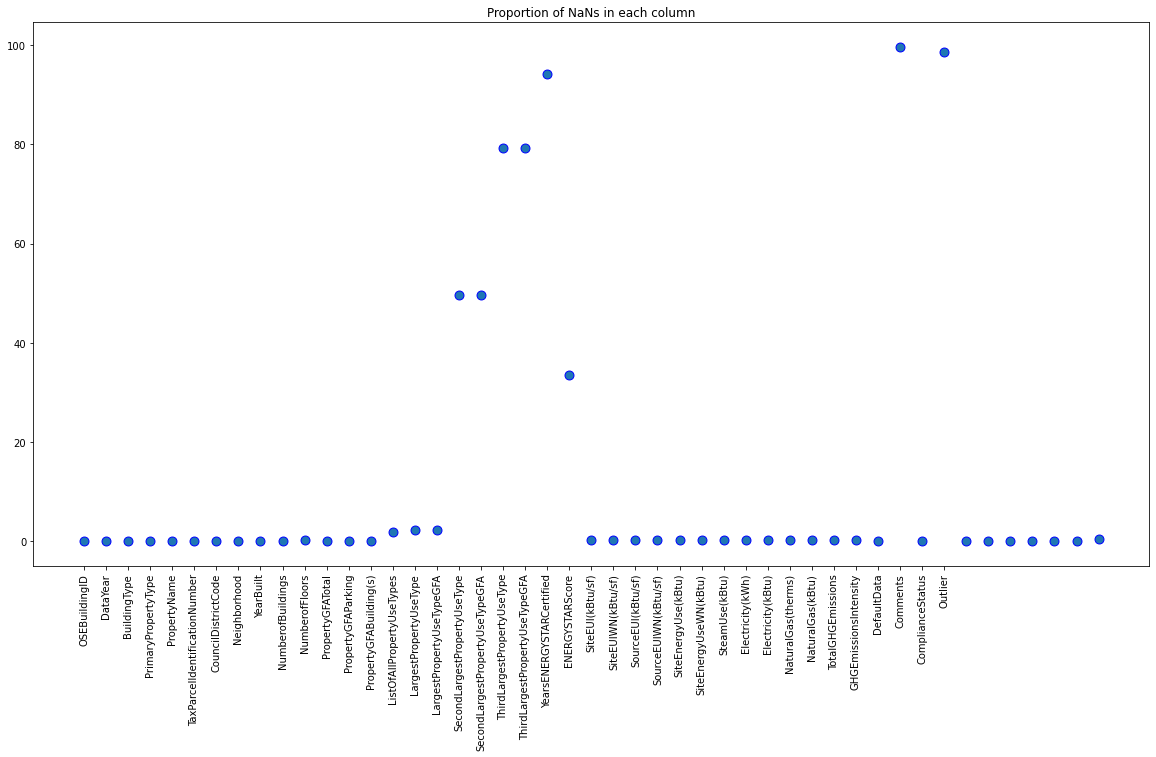

In [24]:
# Proportion des données manquantes par colonne

cols = data.columns 
empty_cells = data.isnull().sum() *100/(len(data))
plt.figure(figsize = (20, 10))
plt.xticks(np.arange(0, 40, step = 1), rotation = 90)
plt.scatter(cols, empty_cells, s = 80, edgecolors ='b', linewidths = 1)
plt.tight_layout
plt.title("Proportion of NaNs in each column");

In [25]:
# Nous affichons les valeurs manquantes du dataframe
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         1
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        8
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes            63
LargestPropertyUseType               71
LargestPropertyUseTypeGFA            71
SecondLargestPropertyUseType       1624
SecondLargestPropertyUseTypeGFA    1624
ThirdLargestPropertyUseType        2599
ThirdLargestPropertyUseTypeGFA     2599
YearsENERGYSTARCertified           3089
ENERGYSTARScore                    1099
SiteEUI(kBtu/sf)                     10
SiteEUIWN(kBtu/sf)                   10


Nous trouvons que la plupart des colonnes n'ont pas beaucoup de donnée manquante. 

Pourtant, quelques colonnes (SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, Comments, Outlier, YearsENERGYSTARCertified et ENERGYSTARScore) contiennent un pourcentage important (> 30%) de données manquantes.

Ces colonnes peuvent être considérées comme inutiles pour la modélisation.

Pourtant, l'ENERGYSTARScore est cruciale pour l'analyse car elle sera utilisée dans la section IV de cette mission.

In [26]:
# Suppression des colonnes qui contiennent beaucoup des données manquantes

data.drop(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA', 'Comments', 'Outlier', 'YearsENERGYSTARCertified'], axis = 1,
          inplace = True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,Compliant,47.612190,-122.337997,0.529256,405 OLIVE WAY,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,False,Compliant,47.612200,-122.337990,0.528083,405 Olive way,Seattle,WA,98101.0
2,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,False,Compliant,47.613170,-122.333930,0.283541,724 Pine street,Seattle,WA,98101.0
3,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,Compliant,47.613106,-122.333358,0.285343,724 PINE ST,SEATTLE,WA,98101.0
4,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,Compliant,47.613349,-122.337699,0.425899,1900 5TH AVE,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,50222,2016,NonResidential,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,Error - Correct Default Data,47.567220,-122.311540,5.626384,1600 S Dakota St,Seattle,WA,NaN
3273,50223,2016,NonResidential,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,Compliant,47.596250,-122.322830,2.294463,719 8th Ave S,Seattle,WA,NaN
3274,50224,2016,NonResidential,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,False,Compliant,47.636440,-122.357840,2.958040,1920 1st Ave W,Seattle,WA,NaN
3275,50225,2016,NonResidential,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,NaN,51.000000,

L'analyse sera effectuée sur les variables commerciales. De ce fait, les données issues de relevés de consommation seront supprimées.

In [27]:
# Suppression des données de consommation en hiver

data.drop(['SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)'], axis = 1, inplace = True)

# Suppression des données de relevés de consommation

data.drop(['NaturalGas(therms)', 'Electricity(kWh)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SteamUse(kBtu)',
           'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity'], axis = 1, inplace = True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,6.981428e+06,249.43,No,Compliant,47.612190,-122.337997,0.529256,405 OLIVE WAY,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,60.0,7.226362e+06,249.98,False,Compliant,47.612200,-122.337990,0.528083,405 Olive way,Seattle,WA,98101.0
2,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,8.387933e+06,295.86,False,Compliant,47.613170,-122.333930,0.283541,724 Pine street,Seattle,WA,98101.0
3,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,8.354235e+06,263.51,No,Compliant,47.613106,-122.333358,0.285343,724 PINE ST,SEATTLE,WA,98101.0
4,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,7.313066e+07,2061.48,Yes,Compliant,47.613349,-122.337699,0.425899,1900 5TH AVE,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,50222,2016,NonResidential,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,46.0,8.497457e+05,20.94,True,Error - Correct Default Data,47.567220,-122.311540,5.626384,1600 S Dakota St,Seattle,WA,NaN
3273,50223,2016,NonResidential,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,9.502762e+05,32.17,False,Compliant,47.596250,-122.322830,2.294463,719 8th Ave S,Seattle,WA,NaN
3274,50224,2016,NonResidential,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,NaN,5.765898e+06,223.54,False,Compliant,47.636440,-122.357840,2.958040,1920 1st Ave W,Seattle,WA,NaN
3275,50225,2016,NonResidential,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,NaN,7.194712e+05,22.11,False,Compliant,47.528320,-122.324310,9.735542,8319 8th Ave S,Seattle,WA,NaN


Ayant supprimé les données issues de relevés de consommation, nous allons traiter les autres variables une par une. Pendant le traitement, nous prendrons le choix de supprimer ou garder la variable pour la modélisation. Nous commençons avec les variables catégorielles.

In [28]:
# Définition du type des variables

var_cat = list(data.dtypes[data.dtypes == np.object].index)
var_num = list(data.dtypes[data.dtypes != np.object].index)

print("Les variables catégorielles sont:\n", var_cat)

print("Les variables numériques sont:\n", var_num)
print("")

Les variables catégorielles sont:
 ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'DefaultData', 'ComplianceStatus', 'Address', 'City', 'State']
Les variables numériques sont:
 ['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Latitude', 'Longitude', 'Distance', 'ZipCode']



Nous cherchons le nombre des valeurs uniques pour chaque variable catégorielle.

In [29]:
# Compter les valeurs uniques de chaque variable catégorielle.

for column in var_cat:
    print('{}: {} uniques values'.format(column, len(data[column].unique())))

BuildingType: 3 uniques values
PrimaryPropertyType: 23 uniques values
PropertyName: 3163 uniques values
TaxParcelIdentificationNumber: 1815 uniques values
Neighborhood: 19 uniques values
ListOfAllPropertyUseTypes: 379 uniques values
LargestPropertyUseType: 58 uniques values
DefaultData: 5 uniques values
ComplianceStatus: 4 uniques values
Address: 3079 uniques values
City: 2 uniques values
State: 1 uniques values


Ces variables (PropertyName, TaxParcelIdentificationNumber, ListOfAllPropertyUseTypes, LargestPropertyUseType,
et Address) contiennent beaucoup des valeurs uniques. De ce fait, il est difficile de modéliser ces variables. Nous les supprimons du dataframe 'data'.

In [30]:
# Suppression des variables catégorielles avec beaucoup de données

data.drop(['PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
           'Address'], axis = 1, inplace = True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,City,State,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,88434.0,65.0,6.981428e+06,249.43,No,Compliant,47.612190,-122.337997,0.529256,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,88434.0,60.0,7.226362e+06,249.98,False,Compliant,47.612200,-122.337990,0.528083,Seattle,WA,98101.0
2,2,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,83880.0,61.0,8.387933e+06,295.86,False,Compliant,47.613170,-122.333930,0.283541,Seattle,WA,98101.0
3,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,83880.0,51.0,8.354235e+06,263.51,No,Compliant,47.613106,-122.333358,0.285343,SEATTLE,WA,98101.0
4,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,757243.0,18.0,7.313066e+07,2061.48,Yes,Compliant,47.613349,-122.337699,0.425899,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,50222,2016,NonResidential,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,12294.0,46.0,8.497457e+05,20.94,True,Error - Correct Default Data,47.567220,-122.311540,5.626384,Seattle,WA,NaN
3273,50223,2016,NonResidential,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,16000.0,NaN,9.502762e+05,32.17,False,Compliant,47.596250,-122.322830,2.294463,Seattle,WA,NaN
3274,50224,2016,NonResidential,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,7583.0,NaN,5.765898e+06,223.54,False,Compliant,47.636440,-122.357840,2.958040,Seattle,WA,NaN
3275,50225,2016,NonResidential,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,6601.0,NaN,7.194712e+05,22.11,False,Compliant,47.528320,-122.324310,9.735542,Seattle,WA,NaN


Du fait que nous ne travaillons pas sur 'LargestPropertyUseType', la variable 'LargestPropertyUseTypeGFA' n'est pas considérée comme signifiante.

In [31]:
# Suppression du LargestPropertyUseTypeGFA parce que nous n'utilisons pas LargestPropertyUseType

data.drop(['LargestPropertyUseTypeGFA'], axis = 1, inplace = True)

Nous trouvons des différentes orthographes pour les quartiers (Neighborhood) de bâtiments. D'abord, nous corrigeons ces orthographes.

In [32]:
# Groupby Neighborhood

data.groupby(['Neighborhood']).count()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,City,State,ZipCode
Neighborhood,,,,,,,,,,,,,,,,,,,,,,
BALLARD,133,133,133,133,133,133,133,133,133,133,133,83,133,133,133,133,133,133,133,133,133,130
Ballard,6,6,6,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6
CENTRAL,105,105,105,105,105,105,105,105,105,105,105,67,104,104,105,105,105,105,105,105,105,103
Central,5,5,5,5,5,5,5,5,5,5,5,2,5,5,5,5,5,5,5,5,5,5
DELRIDGE,87,87,87,87,87,87,87,87,87,87,87,62,87,87,87,87,87,87,87,87,87,87
DELRIDGE NEIGHBORHOODS,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0
DOWNTOWN,722,722,722,722,722,722,721,722,722,722,722,499,721,721,722,722,722,722,722,722,722,721
Delridge,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4
EAST,236,236,236,236,236,236,236,236,236,236,236,139,236,236,236,236,236,236,236,236,236,235


In [33]:
# Correction des valeurs 'Neighborhood'

data.loc[data['Neighborhood'] == 'Ballard', 'Neighborhood'] = 'BALLARD'
data.loc[data['Neighborhood'] == 'Central', 'Neighborhood'] = 'CENTRAL'
data.loc[data['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'
data.loc[data['Neighborhood'] == 'Delridge', 'Neighborhood'] = 'DELRIDGE'
data.loc[data['Neighborhood'] == 'Northwest', 'Neighborhood'] = 'NORTHWEST'
data.loc[data['Neighborhood'] == 'North', 'Neighborhood'] = 'NORTH'
data.groupby(['Neighborhood']).count()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,City,State,ZipCode
Neighborhood,,,,,,,,,,,,,,,,,,,,,,
BALLARD,139,139,139,139,139,139,139,139,139,139,139,87,139,139,139,139,139,139,139,139,139,136
CENTRAL,110,110,110,110,110,110,110,110,110,110,110,69,109,109,110,110,110,110,110,110,110,108
DELRIDGE,92,92,92,92,92,92,92,92,92,92,92,65,92,92,92,92,92,92,92,92,92,91
DOWNTOWN,722,722,722,722,722,722,721,722,722,722,722,499,721,721,722,722,722,722,722,722,722,721
EAST,236,236,236,236,236,236,236,236,236,236,236,139,236,236,236,236,236,236,236,236,236,235
GREATER DUWAMISH,686,686,686,686,686,686,686,683,686,686,686,436,686,686,686,686,686,686,686,686,686,683
LAKE UNION,293,293,293,293,293,293,293,293,293,293,293,212,292,292,292,293,293,293,293,293,293,293
MAGNOLIA / QUEEN ANNE,297,297,297,297,297,297,297,297,297,297,297,185,297,297,297,297,297,297,297,297,297,295
NORTH,132,132,132,132,132,132,132,132,132,132,132,82,131,131,132,132,132,132,132,132,132,130


Maintenant, nous corrigeons les valeurs de 'DefaultData' et 'ComplianceStatus'.

In [34]:
# Valeurs uniques de ComplianceStatus et DefaultData

print(data.ComplianceStatus.unique())
print(data.DefaultData.unique())

['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']
['No' False 'Yes' True nan]


ComplianceStatus:

Les valeurs erronnées peuvent être considérées comme des valeurs non conformes.

DefaultData:

Les valeurs d'Oui (Yes) et Non (No) sont converties à Vraies (True) ou Fausses (False).

Les valeurs manquantes indiquent que cette donnée n'est pas la donnée par défaut. Nous rendons ces valeurs Fausses (False).

In [35]:
# Correction de 'DefaultData' et 'ComplianceStatus'

data.loc[data['ComplianceStatus'] == 'Error - Correct Default Data', 'ComplianceStatus'] = 'Non-Compliant'
data.loc[data['DefaultData'] == 'No', 'DefaultData'] = False
data.loc[data['DefaultData'] == 'Yes', 'DefaultData'] = True
data['ComplianceStatus'].fillna('Missing Data', inplace = True)
data['DefaultData'].fillna(False, inplace = True)

Nous vérifions les valeurs de 'City' et 'State'.

In [36]:
# Valeurs unique de 'State'

print(data.City.unique())
print(data.State.unique())

['SEATTLE' 'Seattle']
['WA']


Ces variables contiennent une seule valeur unique (Différentes orthographes pour 'City'). Ces variables ne seront pas utiles pour la modélisation et elles sont supprimées.

In [37]:
# Suppression des variables avec une seule valeur

data.drop(['City', 'State'], axis = 1, inplace = True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Distance,ZipCode
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,65.0,6.981428e+06,249.43,False,Compliant,47.612190,-122.337997,0.529256,98101.0
1,1,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,60.0,7.226362e+06,249.98,False,Compliant,47.612200,-122.337990,0.528083,98101.0
2,2,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,61.0,8.387933e+06,295.86,False,Compliant,47.613170,-122.333930,0.283541,98101.0
3,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,51.0,8.354235e+06,263.51,False,Compliant,47.613106,-122.333358,0.285343,98101.0
4,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,18.0,7.313066e+07,2061.48,True,Compliant,47.613349,-122.337699,0.425899,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,50222,2016,NonResidential,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,46.0,8.497457e+05,20.94,True,Non-Compliant,47.567220,-122.311540,5.626384,NaN
3273,50223,2016,NonResidential,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,NaN,9.502762e+05,32.17,False,Compliant,47.596250,-122.322830,2.294463,NaN
3274,50224,2016,NonResidential,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,NaN,5.765898e+06,223.54,False,Compliant,47.636440,-122.357840,2.958040,NaN
3275,50225,2016,NonResidential,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,NaN,7.194712e+05,22.11,False,Compliant,47.528320,-122.324310,9.735542,NaN


Un bâtiment, par définition, doit avoir au moins un étage et un immeuble. 

De ce fait, nous remplaçons les valeurs manquantes de 'NumberofBuildings'  et 'NumberofFloors' avec une valeur de 1. Nous faisons ceci car il est probable que la personne n'a pas entré de valeur car le bâtiment ne contient pas plusieurs immeubles ou plusieurs étages.

In [38]:
# Remplissage des données manquantes du nombre des bâtiments et étages

data['NumberofBuildings'].fillna(0, inplace = True)
data['NumberofFloors'].fillna(0, inplace = True)

# Nous remplaçons les valeurs zéro par un afin que le bâtiment puisse avoir au moins un bâtiment et un étage

data['NumberofBuildings'].replace(0, 1, inplace = True)
data['NumberofFloors'].replace(0, 1, inplace = True)

Il y a aussi des données manquantes pour les variables importantes commes les cibles et ENERGYSTARScore. Nous les traitons avec kNN-Imputer.

In [39]:
# Utilisation de kNN-Imputer pour remplacer les valeurs manquantes 

df = data[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'ENERGYSTARScore', 'ZipCode']]
imputer = KNNImputer(n_neighbors = 5)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
data['SiteEnergyUse(kBtu)'] = df['SiteEnergyUse(kBtu)']
data['TotalGHGEmissions'] = df['TotalGHGEmissions']
data['ENERGYSTARScore'] = df['ENERGYSTARScore']
data['ZipCode'] = df['ZipCode']

# Nous affichons les valeurs manquantes du dataframe
data.isna().sum()

OSEBuildingID             0
DataYear                  0
BuildingType              0
PrimaryPropertyType       0
CouncilDistrictCode       0
Neighborhood              0
YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
ENERGYSTARScore           0
SiteEnergyUse(kBtu)       0
TotalGHGEmissions         0
DefaultData               0
ComplianceStatus          0
Latitude                  0
Longitude                 0
Distance                  0
ZipCode                   0
dtype: int64

Ainsi, nous obtenons un dataframe sans donnée manquante. Nous abordons le problème des outliers avant de faire du preprocessing des données.

In [40]:
# describe() pour trouver les outliers

data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Distance,ZipCode
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3.277000e+03,3277.000000,3.277000e+03,3277.000000,3.277000e+03,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000
mean,15837.746109,2015.501678,4.363137,1961.625877,1.134574,4.127556,1.163565e+05,13413.015868,1.029435e+05,65.404089,8.124264e+06,178.080353,47.615669,-122.333179,4.516263,98116.543851
std,13382.344255,0.500073,2.203191,32.654121,2.228523,6.589913,2.525498e+05,43838.943202,2.354197e+05,24.990542,2.537194e+07,669.573444,0.048244,0.024593,3.431074,16.791339
min,1.000000,2015.000000,1.000000,1900.000000,1.000000,1.000000,1.128500e+04,-2.000000,-5.055000e+04,1.000000,0.000000e+00,-0.800000,47.499170,-122.411820,0.047765,98006.000000
25%,576.000000,2015.000000,2.000000,1930.000000,1.000000,1.000000,2.963600e+04,0.000000,2.858400e+04,52.000000,1.223296e+06,19.700000,47.585090,-122.343400,1.436159,98105.000000
50%,21116.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.929900e+04,0.000000,4.760200e+04,69.200000,2.520483e+06,49.120000,47.612170,-122.333160,3.873307,98109.000000
75%,24536.000000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447200e+04,84.600000,6.983736e+06,139.210000,47.648671,-122.322110,6.923239,98124.000000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,47.733870,-122.258640,13.981938,98199.000000


Nous trouvons quelques variables qui ont des valeurs négatives. Les valeurs négatives de Longitude est compréhensible.

Par contre, il est impossible d'avoir des valeurs négatives pour TotalGHG Emissions. Il est impossible d'émettre une valeur négative des emissions.

De plus, on ne peut pas avoir une valeur négative du PropertyGFAParking et PropertyGFABuilding(s). Un bâtiment ne peut avoir de surface négative. De plus, PropertyGFATotal est positive pour toutes les valeurs.

De ce fait, nous rendons ces valeurs positives.

In [41]:
# Il est impossible d'avoir des valeurs négatives pour ces colonnes

data['TotalGHGEmissions'] = data['TotalGHGEmissions'].abs()
data['PropertyGFABuilding(s)'] = data['PropertyGFABuilding(s)'].abs()
data['PropertyGFAParking'] = data['PropertyGFAParking'].abs()

Nous avons traité toutes les variables du dataframe 'data'. Pendant la modélisation, nous avons constaté que quelques variables ne sont pas utiles pour la modélisation. Nous supprimons ces variables afin de préparer le dataframe pour le prétraitement avant la modélisation.

In [42]:
# Supprimer les colonnes inutiles pour la modélisation

data.drop(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'DefaultData', 'ZipCode'],  axis = 1, inplace = True)
data

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ComplianceStatus,Latitude,Longitude,Distance
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,65.0,6.981428e+06,249.43,Compliant,47.612190,-122.337997,0.529256
1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,60.0,7.226362e+06,249.98,Compliant,47.612200,-122.337990,0.528083
2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,61.0,8.387933e+06,295.86,Compliant,47.613170,-122.333930,0.283541
3,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,51.0,8.354235e+06,263.51,Compliant,47.613106,-122.333358,0.285343
4,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990,0,961990,18.0,7.313066e+07,2061.48,Compliant,47.613349,-122.337699,0.425899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,NonResidential,Office,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,46.0,8.497457e+05,20.94,Non-Compliant,47.567220,-122.311540,5.626384
3273,NonResidential,Other,DOWNTOWN,2004,1.0,1.0,16000,0,16000,89.8,9.502762e+05,32.17,Compliant,47.596250,-122.322830,2.294463
3274,NonResidential,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,51.2,5.765898e+06,223.54,Compliant,47.636440,-122.357840,2.958040
3275,NonResidential,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,84.0,7.194712e+05,22.11,Compliant,47.528320,-122.324310,9.735542


<h3><center>I.4. Prétraitement des données avant la modélisation</h3></center>

Nous redéfinissons les variables catégorielles et numériques.

In [43]:
# Définition du type des variables

var_cat = list(data.dtypes[data.dtypes == np.object].index)
var_num = list(data.dtypes[data.dtypes != np.object].index)

Pour la modélisation, les différents types de variables sont:

<h4>Variable Numériques:</h4>
'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
'PropertyGFABuilding(s)', 'Latitude', 'Longitude', 'Distance'.

<h4>Variable Catégorielles:</h4>
'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'ComplianceStatus'.

<h4>Cibles:</h4>
'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'.

Il y a aussi l'ENERGYSTARScore dont son influence sur le TotalGHGEmissions est à étudier.

Les variables catégorielles seront standardisées avec OneHotEncoder() et les variables numériques seront standardisées avec np.log() et StandardScaler().

In [44]:
# OneHotEncoder pour les variables catégorielles

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[var_cat]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3274,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Les variables catégorielles sont standardisées. Nous obtenons 42 variables. Afin de savoir à quoi correspond ces 42 variables, nous affichons les valeurs uniques des variables catégorielles.

In [45]:
# Compter les valeurs uniques de chaque variable catégorielle.

for column in var_cat:
    print('{}: {} uniques values'.format(column, len(data[column].unique())))

BuildingType: 3 uniques values
PrimaryPropertyType: 23 uniques values
Neighborhood: 13 uniques values
ComplianceStatus: 3 uniques values


De ce fait, les premières 3 variables du enc_df correspond à BuildingType, les prochaines 23 à PrimaryPropertyType, etc...

Afin de distinguer le nom des features catégorielles, nous allons créer un dataframe: features_list.

In [46]:
# Get dummies
categs_list = pd.get_dummies(data[var_cat], prefix_sep='_', drop_first=False)
categs_names = categs_list.columns

# Le nombre des features est défini à partir de 9 car les premières 8 features sont les features numériques

feat_num =[]
for i in range(9,51):
    feat_num.append(i)
flist={'Feature_Number':feat_num, 'Feature_Name':categs_names}
features_list = pd.DataFrame(flist)
features_list

,Feature_Number,Feature_Name
0,9,BuildingType_Campus
1,10,BuildingType_NonResidential
2,11,BuildingType_SPS-District K-12
3,12,PrimaryPropertyType_College/University
4,13,PrimaryPropertyType_Distribution Center
5,14,PrimaryPropertyType_Hospital
6,15,PrimaryPropertyType_Hotel
7,16,PrimaryPropertyType_K-12 School
8,17,PrimaryPropertyType_Laboratory
9,18,PrimaryPropertyType_Large Office


Maintenant, nous allons standardiser les variables numériques avec np.log et StandardScaler().

Nous utilisons np.log() car la distribution des cibles peuvent être considérée comme une distribution logarithmique. Avant d'utiliser np.log(), nous ajoutons un constant aux toutes les variables numériques afin de les rendre positives. Ceci est fait car nous ne pouvons pas utiliser np.log() sur une valeur négative.

In [47]:
# describe() afin de trouver la valeur la plus négative

data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Distance
count,3277.000000,3277.000000,3277.000000,3.277000e+03,3277.000000,3.277000e+03,3277.000000,3.277000e+03,3277.000000,3277.000000,3277.000000,3277.000000
mean,1961.625877,1.134574,4.127556,1.163565e+05,13413.017089,1.030008e+05,65.404089,8.124264e+06,178.080842,47.615669,-122.333179,4.516263
std,32.654121,2.228523,6.589913,2.525498e+05,43838.942828,2.353946e+05,24.990542,2.537194e+07,669.573314,0.048244,0.024593,3.431074
min,1900.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,0.000000e+00,0.000000,47.499170,-122.411820,0.047765
25%,1930.000000,1.000000,1.000000,2.963600e+04,0.000000,2.858600e+04,52.000000,1.223296e+06,19.700000,47.585090,-122.343400,1.436159
50%,1965.000000,1.000000,2.000000,4.929900e+04,0.000000,4.760200e+04,69.200000,2.520483e+06,49.120000,47.612170,-122.333160,3.873307
75%,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447200e+04,84.600000,6.983736e+06,139.210000,47.648671,-122.322110,6.923239
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,47.733870,-122.258640,13.981938


La valeur la plus négative est data['Longitude'] = -122.33179.

Nous ajoutons un constant de 123 avant d'utiliser np.log()

In [48]:
# np.log() sur les variables numériques

data[var_num]=data[var_num]+123
data[var_num] = np.log(data[var_num])

Maintenant, nous pouvons utiliser StandardScaler() pour standardiser les variables numériques.

In [49]:
# Standardisation des variables numériques

ss = StandardScaler()
data[var_num] = ss.fit_transform(data[var_num])
data_num = data[var_num]

Maintenant, les données sont standardisées et prêtes pour la modélisation. Nous ferons la fusion des variables numériques et catégorielles afin d'obtenir un dataframe 'data' qui sera ainsi utilisé pour la modélisation.

In [50]:
# Fusion pour obtenir 'data'

data = data_num.join(enc_df)
data

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,...,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,0.052842,0.597321,0.911524,-0.071984,-0.177609,-1.177079,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.058969,-0.06985,1.339722,0.358979,-0.494835,0.465935,-0.135615,0.620046,0.913953,-0.071782,-0.177305,-1.177435,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.097515,0.718281,1.104870,-0.051671,-0.012023,-1.251700,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.049503,-0.06985,1.177006,0.525541,1.555271,0.466789,-0.488195,0.715628,0.972593,-0.053002,0.011199,-1.251152,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232741,-0.06985,5.598396,2.877725,-0.494835,3.119199,-1.958442,2.145410,3.822846,-0.047961,-0.165443,-1.208449,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.868903,-0.06985,-0.520370,-1.715349,-0.494835,-1.719175,-0.692038,-0.790598,-0.652932,-1.004452,0.881748,0.338267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3273,1.289508,-0.06985,-0.520370,-1.439578,-0.494835,-1.428676,0.919145,-0.716916,-0.529302,-0.402481,0.434764,-0.645330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3274,0.384785,-0.06985,-0.520370,-1.644403,-0.494835,-1.644439,-0.480163,0.471252,0.792953,0.430738,-1.000269,-0.447369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3275,0.838753,-0.06985,-0.520370,-1.571895,-0.494835,-1.568059,0.725946,-0.900260,-0.639610,-1.811250,0.375617,1.516802,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Le dataframe 'data' est maintenant prêt pour la modélisation. Il sera enregistrer afin qu'il puisse être utilisé dans le notebook: Projet_4_Code.

In [51]:
# Enregistrer le dataframe en tant que fichier .csv

data.to_csv('data.csv')